In [1]:
import os
import json
import pandas as pd
import re
import warnings
from google.colab import drive
import ast
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from itertools import chain
from collections import Counter
from operator import itemgetter
from google.colab import files
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressio
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
warnings.simplefilter(action='ignore', category=FutureWarning)
drive.mount('/content/drive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mounted at /content/drive


In [2]:
df_comb=pd.read_csv("/content/drive/MyDrive/data_mining_project/combination.csv")

In [3]:
df_comb=df_comb.drop(columns=['amount_of_tasks','Unnamed: 0'])
df_comb

,index,contribution,amount_authors,relation_amount_tasks,total_tasks,conceptualization,data curation,formal analysis,funding acquisition,investigation,methodology,project administration,resources,software,supervision,validation,visualization,writing – original draft,writing – review editing
0,0,"['formal analysis', 'investigation', 'methodol...",10.0,0.121212,33.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,"['investigation', 'writing – original draft', ...",3.0,0.250000,12.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0,"['conceptualization', 'formal analysis', 'inve...",6.0,0.233333,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0,"['data curation', 'formal analysis', 'investig...",11.0,0.166667,54.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0,"['conceptualization', 'formal analysis', 'inve...",11.0,0.159091,44.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582226,6,"['formal analysis', 'investigation', 'writing ...",10.0,0.073171,41.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1582227,7,"['resources', 'investigation', 'conceptualizat...",10.0,0.097561,41.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1582228,8,"['investigation', 'conceptualization', 'writin...",10.0,0.073171,41.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1582229,9,"['investigation', 'conceptualization', 'writin...",10.0,0.073171,41.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
df_comb=df_comb.dropna()

In [5]:
df=df_comb
df

,index,contribution,amount_authors,relation_amount_tasks,total_tasks,conceptualization,data curation,formal analysis,funding acquisition,investigation,methodology,project administration,resources,software,supervision,validation,visualization,writing – original draft,writing – review editing
0,0,"['formal analysis', 'investigation', 'methodol...",10.0,0.121212,33.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,"['investigation', 'writing – original draft', ...",3.0,0.250000,12.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0,"['conceptualization', 'formal analysis', 'inve...",6.0,0.233333,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0,"['data curation', 'formal analysis', 'investig...",11.0,0.166667,54.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0,"['conceptualization', 'formal analysis', 'inve...",11.0,0.159091,44.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582226,6,"['formal analysis', 'investigation', 'writing ...",10.0,0.073171,41.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1582227,7,"['resources', 'investigation', 'conceptualizat...",10.0,0.097561,41.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1582228,8,"['investigation', 'conceptualization', 'writin...",10.0,0.073171,41.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1582229,9,"['investigation', 'conceptualization', 'writin...",10.0,0.073171,41.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
contribution_types = [
    'conceptualization', 'data curation', 'formal analysis', 'funding acquisition',
    'investigation', 'methodology', 'project administration', 'resources', 'software',
    'supervision', 'validation', 'visualization', 'writing – original draft', 'writing – review editing'
]
for contribution_type in contribution_types:
    df[contribution_type] = df['contribution'].apply(lambda x: 1 if contribution_type in x else 0)

# Splitting the data into features (X) and target variables (y)
X = df.drop(['contribution'] + contribution_types, axis=1)
y = df[contribution_types]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### XGBoost:

In [8]:

# Training separate models for each contribution type
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000]
}

# Training separate models for each contribution type with grid search
models = {}
for contribution_type in contribution_types:
    print(f"Training model for {contribution_type}...")
    model = XGBClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train[contribution_type])
    best_model = grid_search.best_estimator_
    models[contribution_type] = best_model

# Making predictions for each contribution type
predictions = {}
for contribution_type, model in models.items():
    predictions[contribution_type] = model.predict(X_test)

# Evaluating the performance of the models
print("Evaluation results for each contribution type:")
for contribution_type, model_predictions in predictions.items():
    accuracy = accuracy_score(y_test[contribution_type], model_predictions)
    print(f"Contribution Type: {contribution_type}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:")
    print(classification_report(y_test[contribution_type], model_predictions))


<ipython-input-8-aebfb8747a20>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[contribution_type] = df['contribution'].apply(lambda x: 1 if contribution_type in x else 0)


Training model for conceptualization...
Training model for data curation...
Training model for formal analysis...
Training model for funding acquisition...
Training model for investigation...
Training model for methodology...
Training model for project administration...
Training model for resources...
Training model for software...
Training model for supervision...
Training model for validation...
Training model for visualization...
Training model for writing – original draft...
Training model for writing – review editing...
Evaluation results for each contribution type:
Contribution Type: conceptualization
Accuracy: 0.7379445253813604
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77    171342
           1       0.75      0.64      0.69    145091

    accuracy                           0.74    316433
   macro avg       0.74      0.73      0.73    316433
weighted avg       0.74      0.74      0.74    316433

Contri

In [9]:
accuracy_list=[]
for contribution_type, model_predictions in predictions.items():
    accuracy = accuracy_score(y_test[contribution_type], model_predictions)
    print(f"Accuracy {contribution_type}: {accuracy}")
    accuracy_list.append(accuracy)

print("Accuracy Model: ", sum(accuracy_list)/len(accuracy_list))

Accuracy conceptualization: 0.7379445253813604
Accuracy data curation: 0.8532706765729238
Accuracy formal analysis: 0.7146757765466939
Accuracy funding acquisition: 0.9124459206214269
Accuracy investigation: 0.6918052162701109
Accuracy methodology: 0.8461570063804976
Accuracy project administration: 0.915097350781998
Accuracy resources: 0.7828924290450111
Accuracy software: 0.9428536214617312
Accuracy supervision: 0.8844431522628803
Accuracy validation: 0.9105276630439935
Accuracy visualization: 0.930168471682789
Accuracy writing – original draft: 0.8842345773038842
Accuracy writing – review editing: 0.7668953617353437
Accuracy Model:  0.8409579820779032


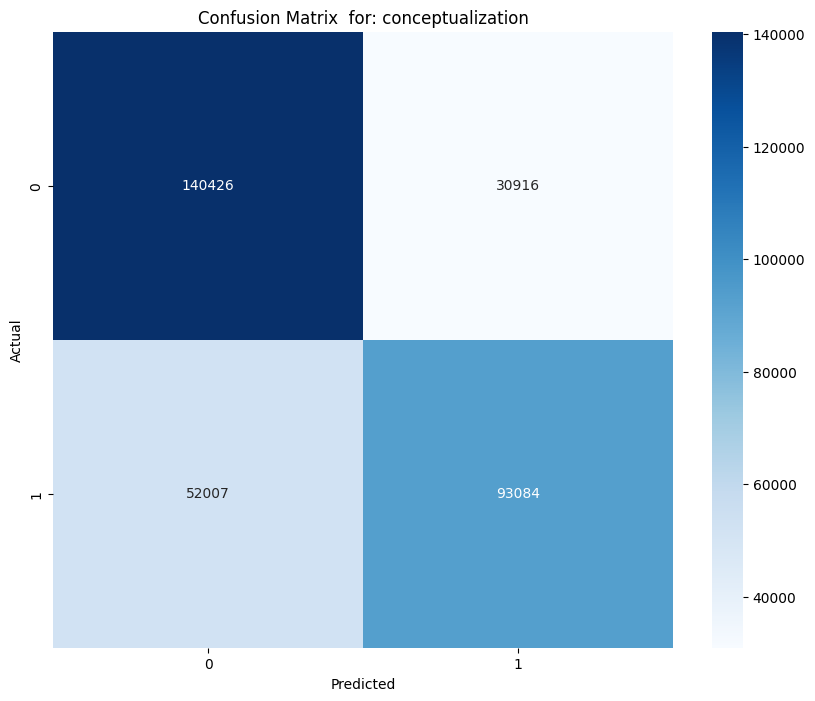

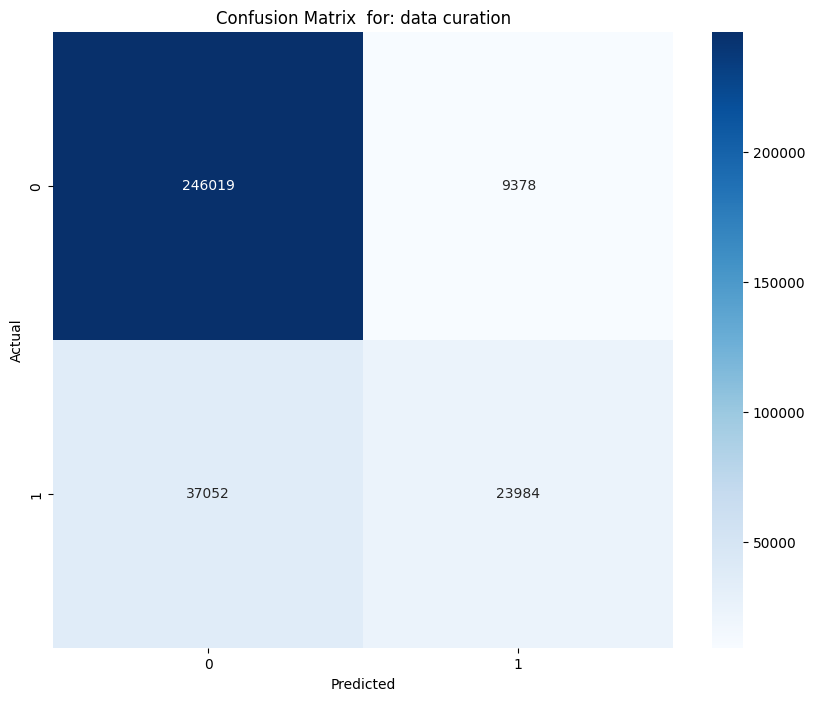

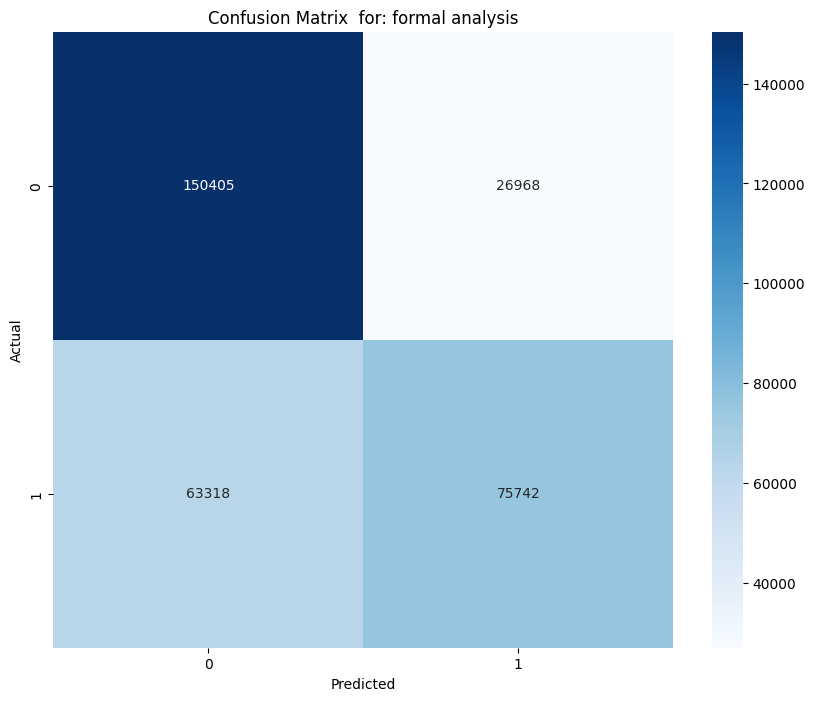

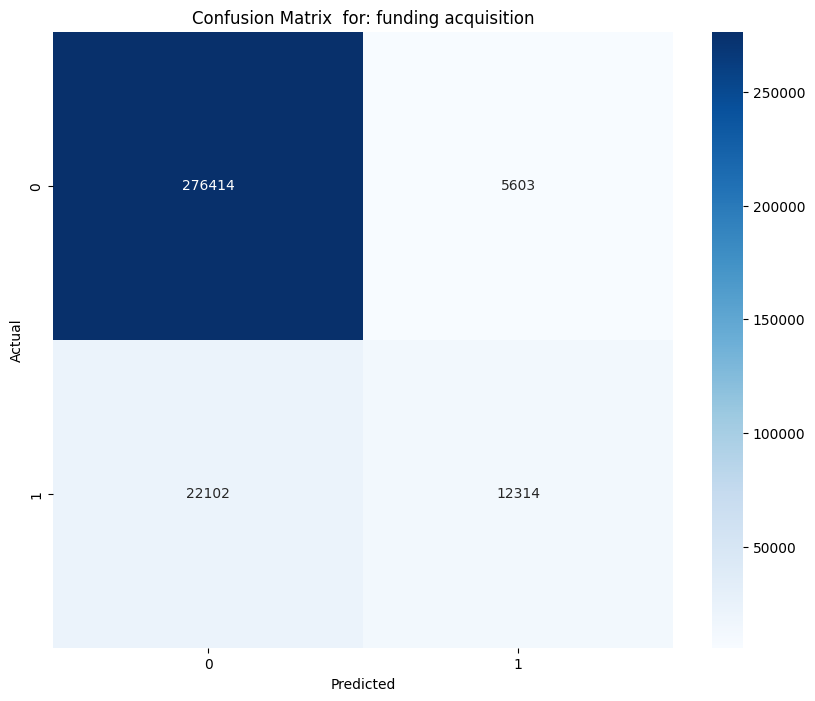

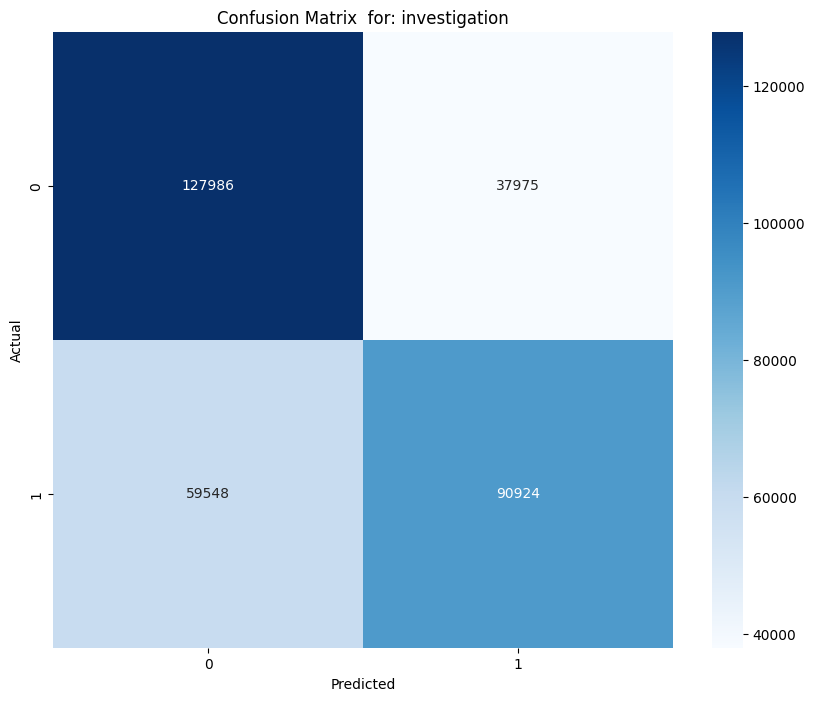

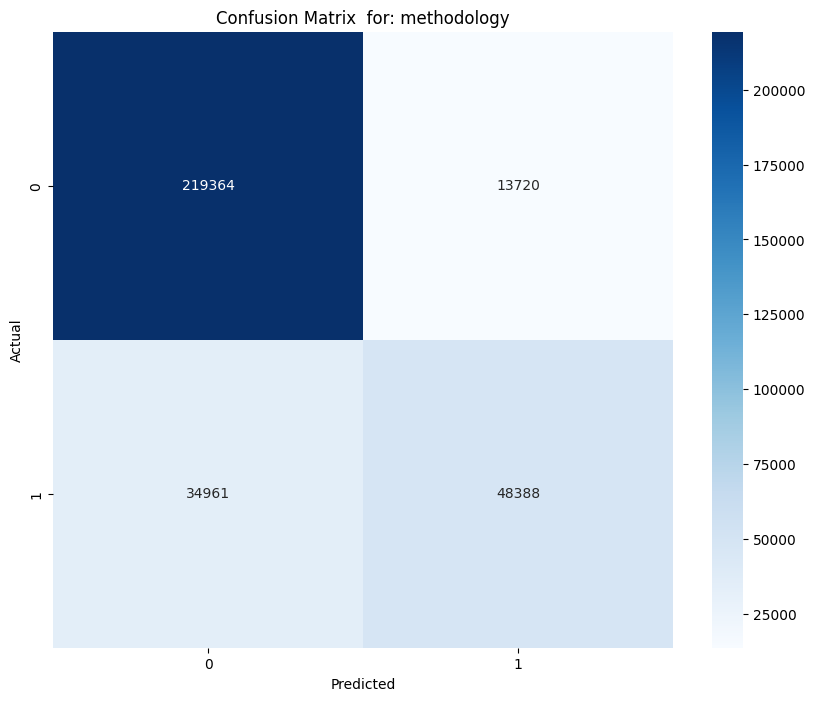

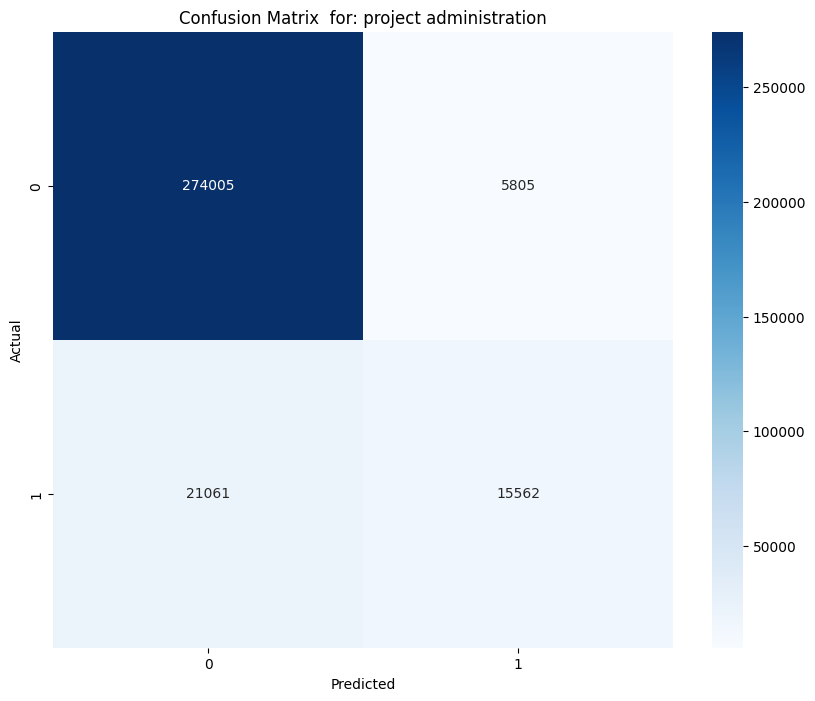

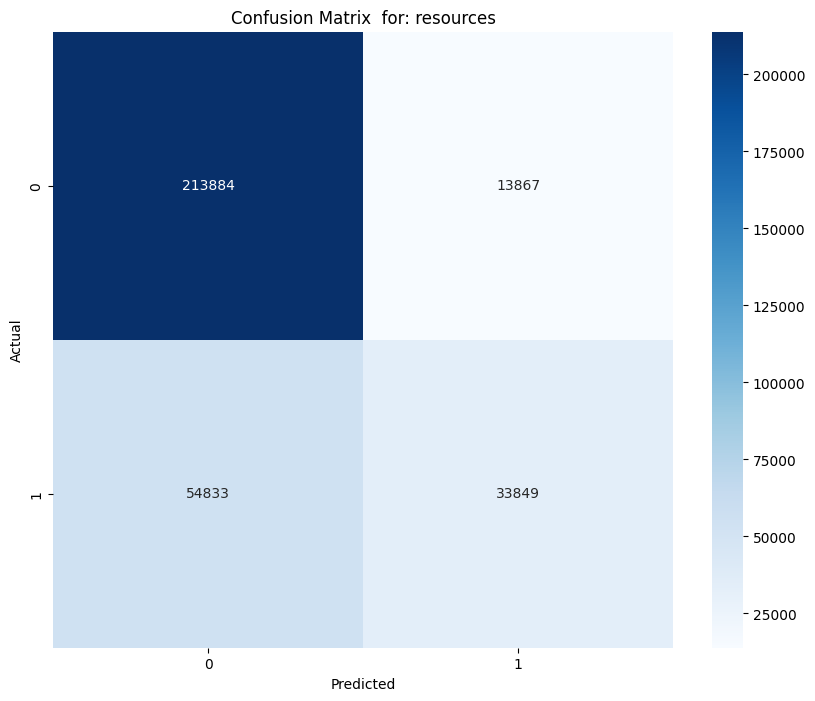

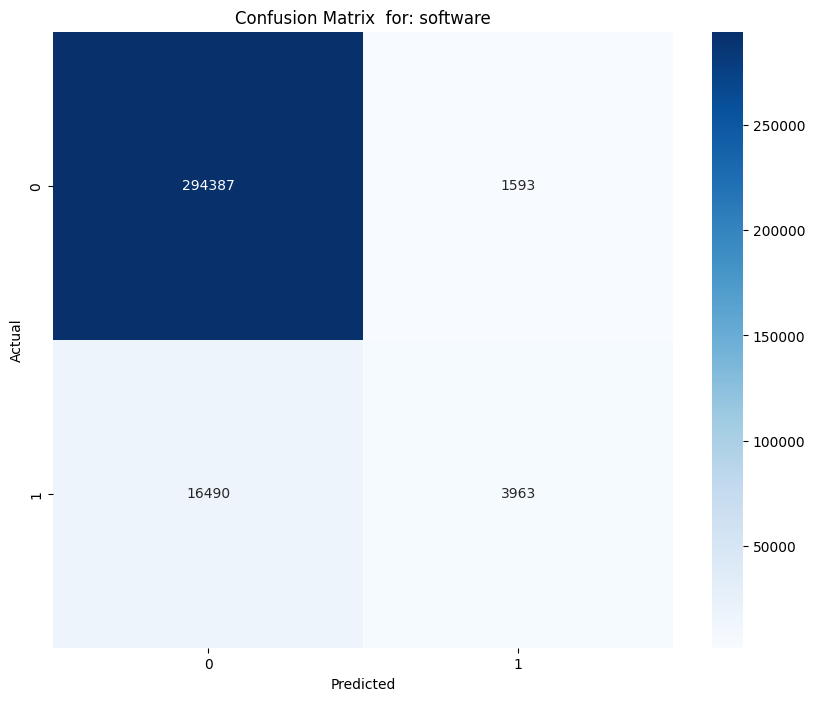

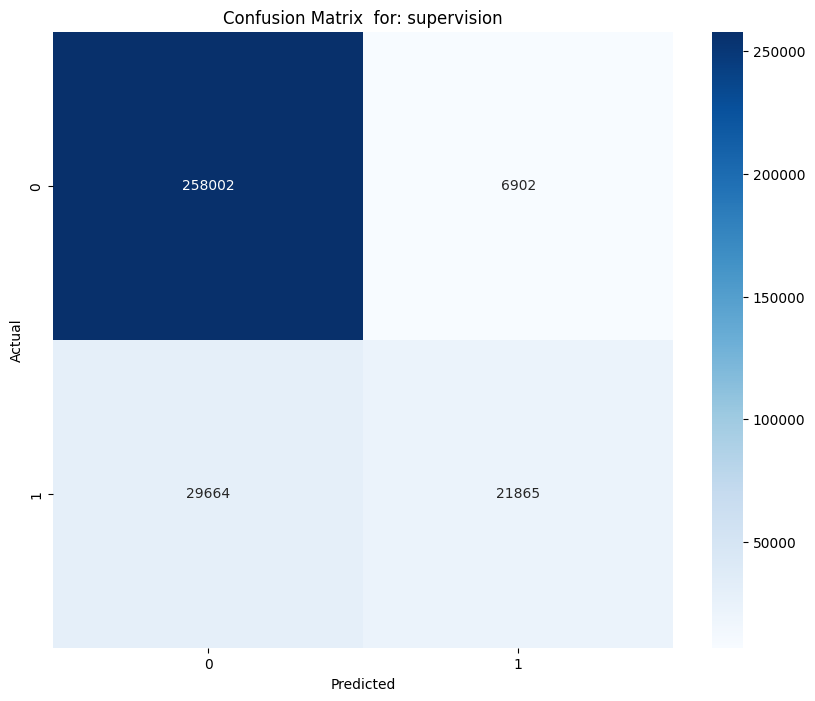

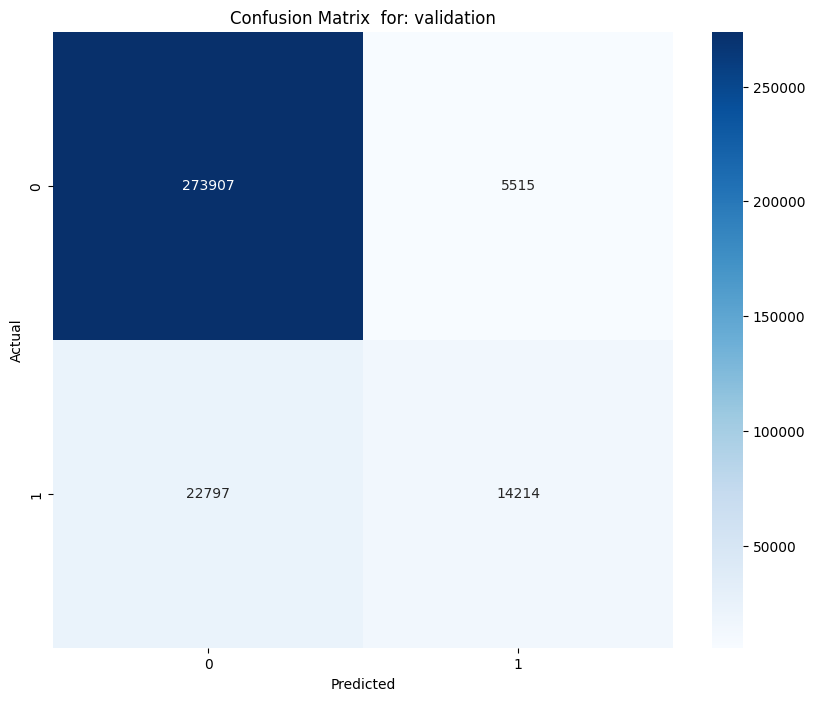

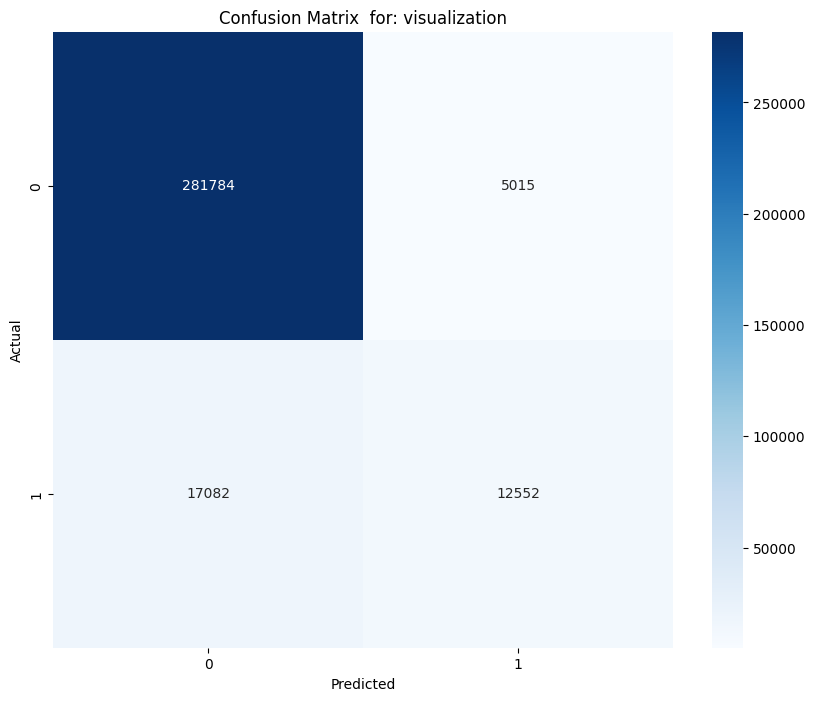

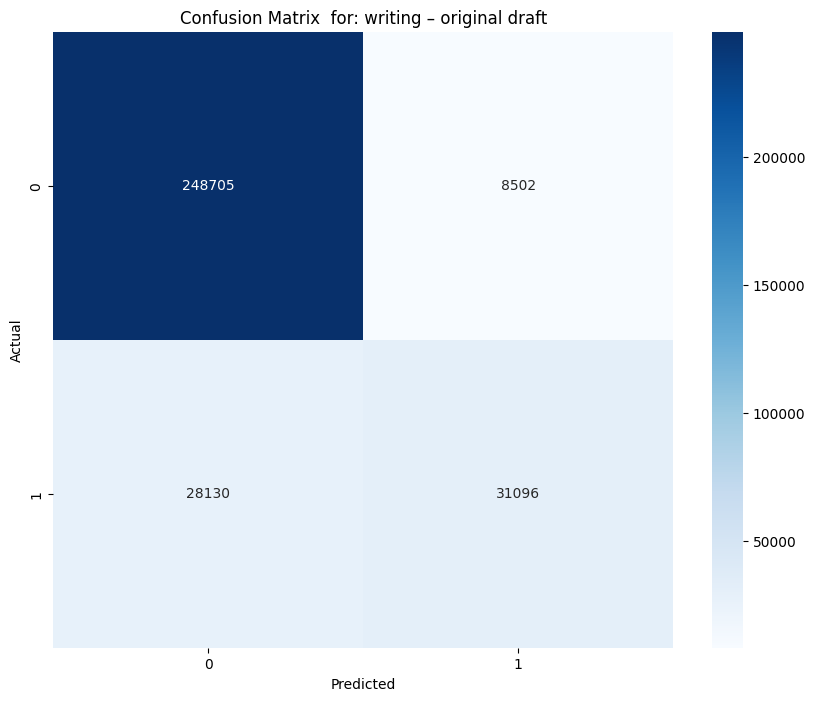

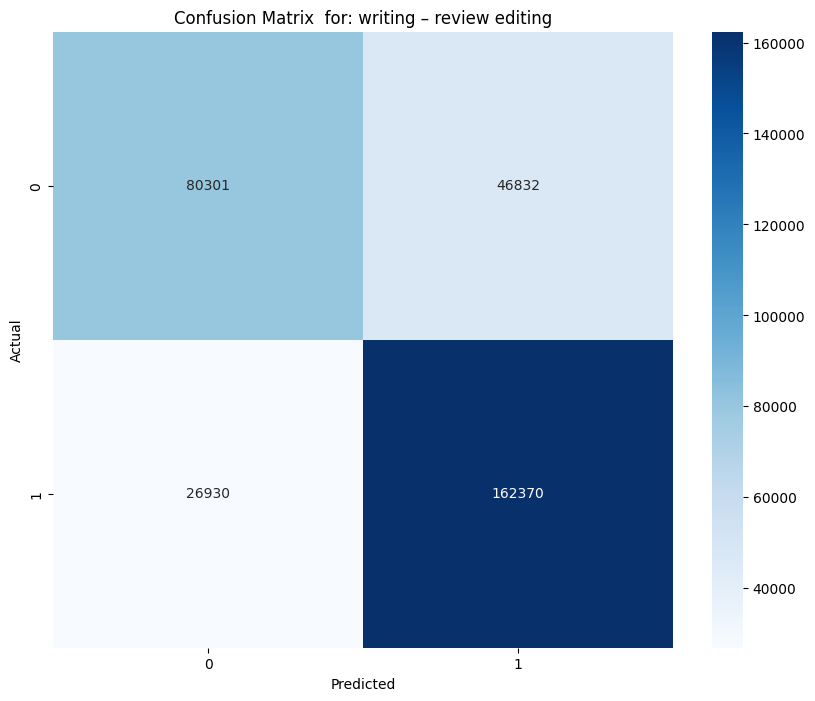

In [18]:
from sklearn.metrics import confusion_matrix
for contribution_type, model_predictions in predictions.items():
  conf_matrix = confusion_matrix(y_test[contribution_type], model_predictions)

  # Visualize the confusion matrix
  plt.figure(figsize=(10, 8))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f"Confusion Matrix  for: {contribution_type}")
  plt.show()

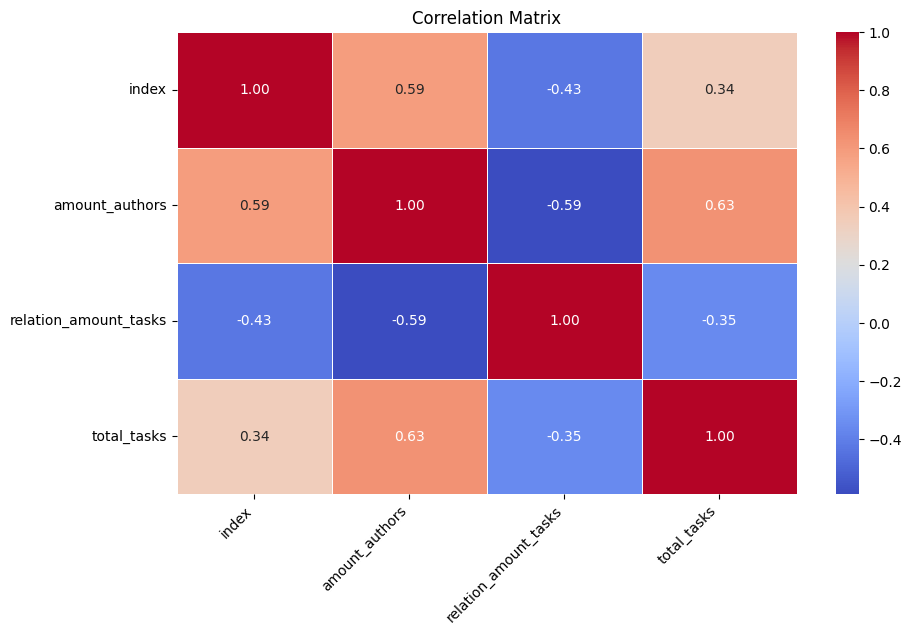

In [12]:
# Calculate the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = X_train.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))  # Increase the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.title('Correlation Matrix')
plt.show()

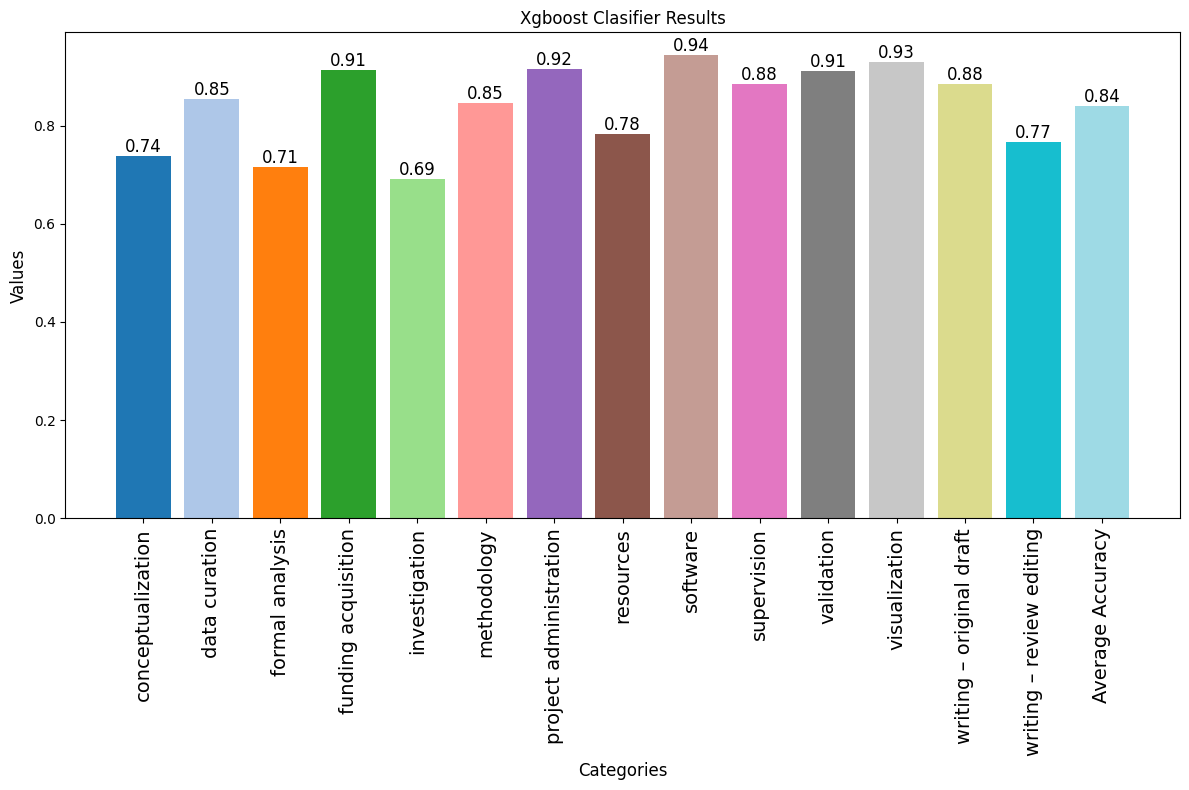

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = list(predictions.keys())+['Average Accuracy']
values = accuracy_list+[0.84]
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

# Create bar plot
plt.figure(figsize=(12, 8))
bars=plt.bar(categories, values,color=colors)

# Rotate x-axis labels
plt.xticks(rotation=90,fontsize=14)

# Add labels and title
plt.xlabel('Categories',fontsize=12)
plt.ylabel('Values',fontsize=12)
plt.title('Xgboost Clasifier Results',fontsize=12)
for bar, value in zip(bars, values):
     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() , f"{value:.2f}",
             ha='center', va='bottom', fontsize=12)
# Show plot
plt.tight_layout()
plt.show()


### Logistic Regression:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Defining hyperparameters grid for grid search
param_grid = {
    'C': [0.001, 0.1, 10],
    'max_iter': [100, 200, 300]
}

# Training separate models for each contribution type with grid search
models = {}
for contribution_type in contribution_types:
    print(f"Training model for {contribution_type}...")
    model = LogisticRegression(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train[contribution_type])
    best_model = grid_search.best_estimator_
    models[contribution_type] = best_model

# Making predictions for each contribution type
predictions = {}
for contribution_type, model in models.items():
    predictions[contribution_type] = model.predict(X_test)

# Evaluating the performance of the models
print("Evaluation results for each contribution type:")
for contribution_type, model_predictions in predictions.items():
    accuracy = accuracy_score(y_test[contribution_type], model_predictions)
    print(f"Contribution Type: {contribution_type}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:")
    print(classification_report(y_test[contribution_type], model_predictions))


In [9]:
# Defining hyperparameters grid for grid search
param_grid = {
    'C': [0.001, 0.1, 10],
    'max_iter': [100, 200, 300]
}

# Training separate models for each contribution type with grid search
models = {}
for contribution_type in contribution_types:
    print(f"Training model for {contribution_type}...")
    model = LogisticRegression(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train[contribution_type])
    best_model = grid_search.best_estimator_
    models[contribution_type] = best_model

# Making predictions for each contribution type
predictions = {}
for contribution_type, model in models.items():
    predictions[contribution_type] = model.predict(X_test)

# Evaluating the performance of the models
print("Evaluation results for each contribution type:")
for contribution_type, model_predictions in predictions.items():
    accuracy = accuracy_score(y_test[contribution_type], model_predictions)
    print(f"Contribution Type: {contribution_type}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:")
    print(classification_report(y_test[contribution_type], model_predictions))


Training model for conceptualization...
Training model for data curation...
Training model for formal analysis...
Training model for funding acquisition...
Training model for investigation...
Training model for methodology...
Training model for project administration...
Training model for resources...
Training model for software...
Training model for supervision...
Training model for validation...
Training model for visualization...
Training model for writing – original draft...
Training model for writing – review editing...
Evaluation results for each contribution type:
Contribution Type: conceptualization
Accuracy: 0.7109783113644911
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75    171342
           1       0.72      0.60      0.65    145091

    accuracy                           0.71    316433
   macro avg       0.71      0.70      0.70    316433
weighted avg       0.71      0.71      0.71    316433

Contri

In [10]:
accuracy_list=[]
for contribution_type, model_predictions in predictions.items():
    accuracy = accuracy_score(y_test[contribution_type], model_predictions)
    print(f"Accuracy {contribution_type}: {accuracy}")
    accuracy_list.append(accuracy)

print("Accuracy Model: ", sum(accuracy_list)/len(accuracy_list))

Accuracy conceptualization: 0.7109783113644911
Accuracy data curation: 0.8321319205013383
Accuracy formal analysis: 0.6898237541596484
Accuracy funding acquisition: 0.8909216168983639
Accuracy investigation: 0.6628006560630528
Accuracy methodology: 0.8132021628591203
Accuracy project administration: 0.8892403763197897
Accuracy resources: 0.7238151520227031
Accuracy software: 0.9346686344344617
Accuracy supervision: 0.8498481511093976
Accuracy validation: 0.8927039847297848
Accuracy visualization: 0.9112545151738283
Accuracy writing – original draft: 0.8464698688189917
Accuracy writing – review editing: 0.7486039698767195
Accuracy Model:  0.814033076737978


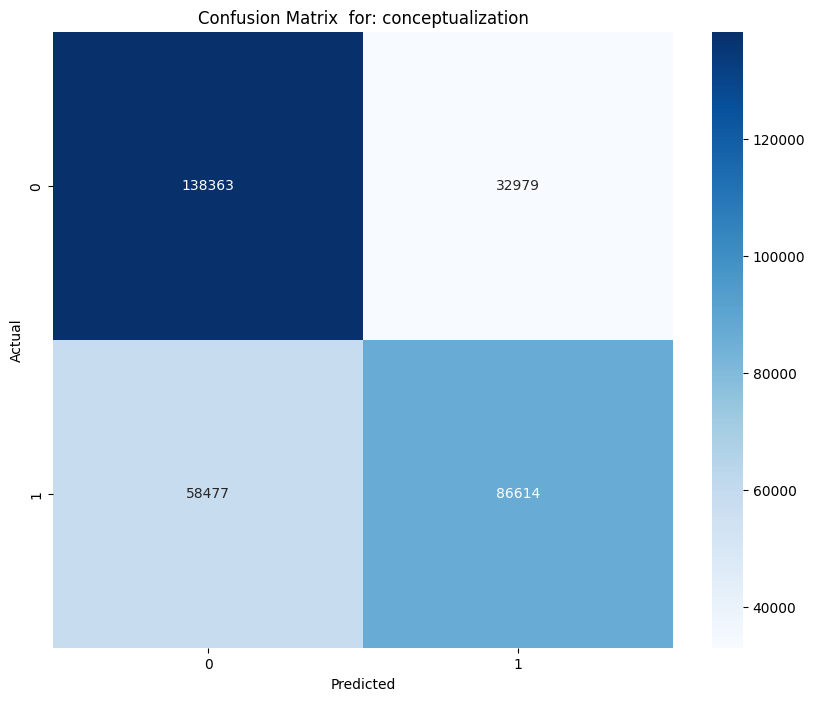

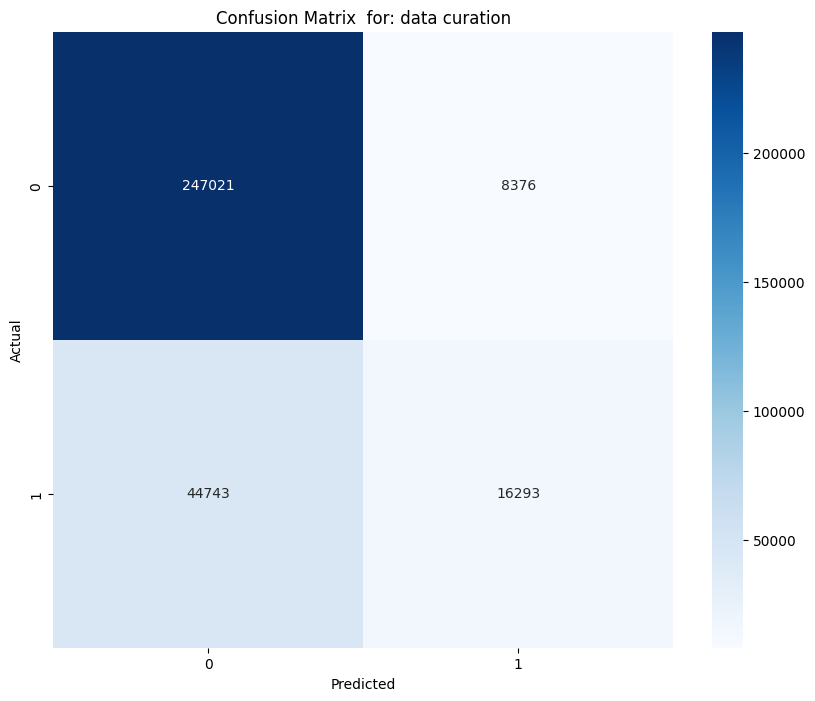

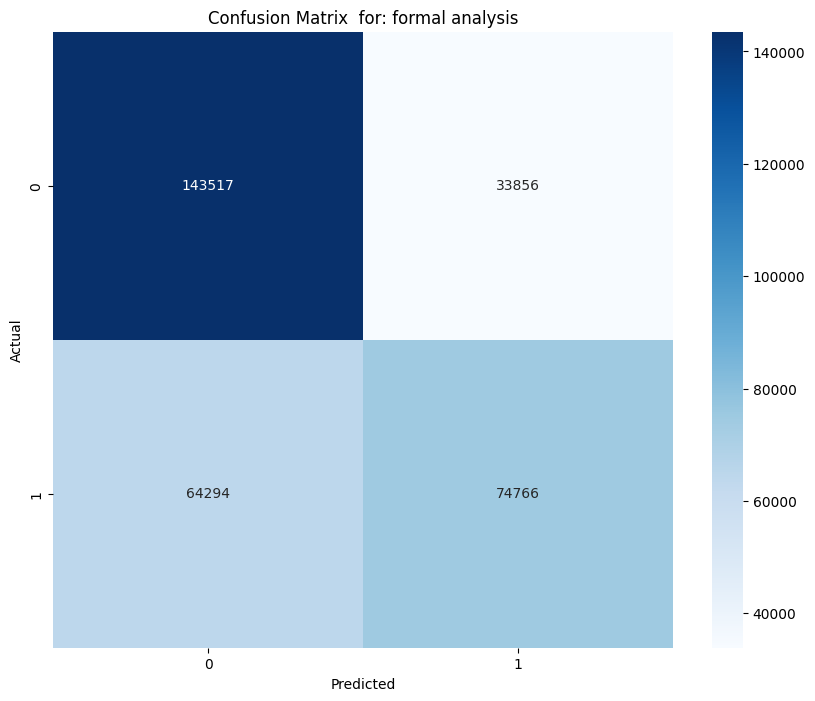

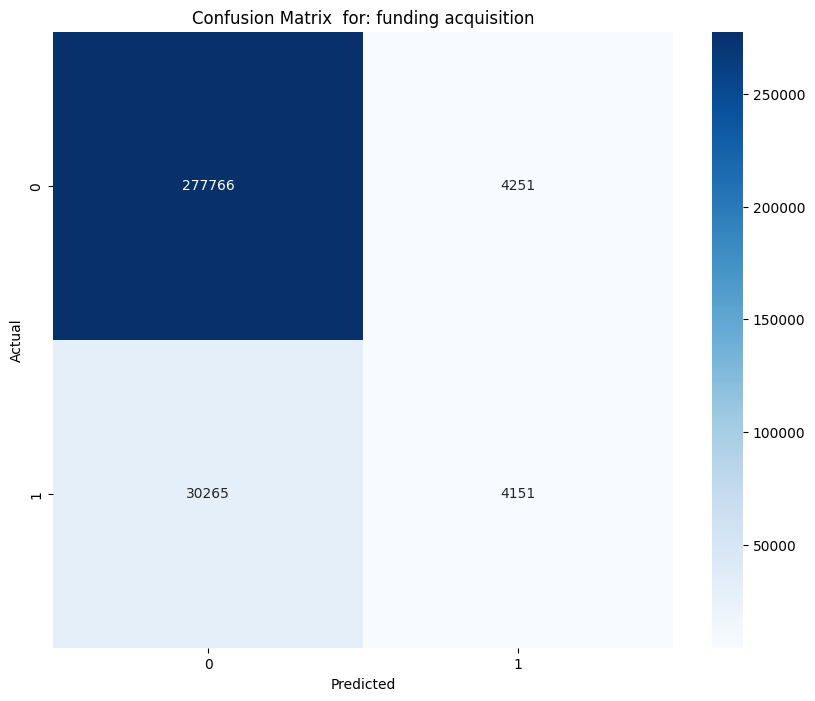

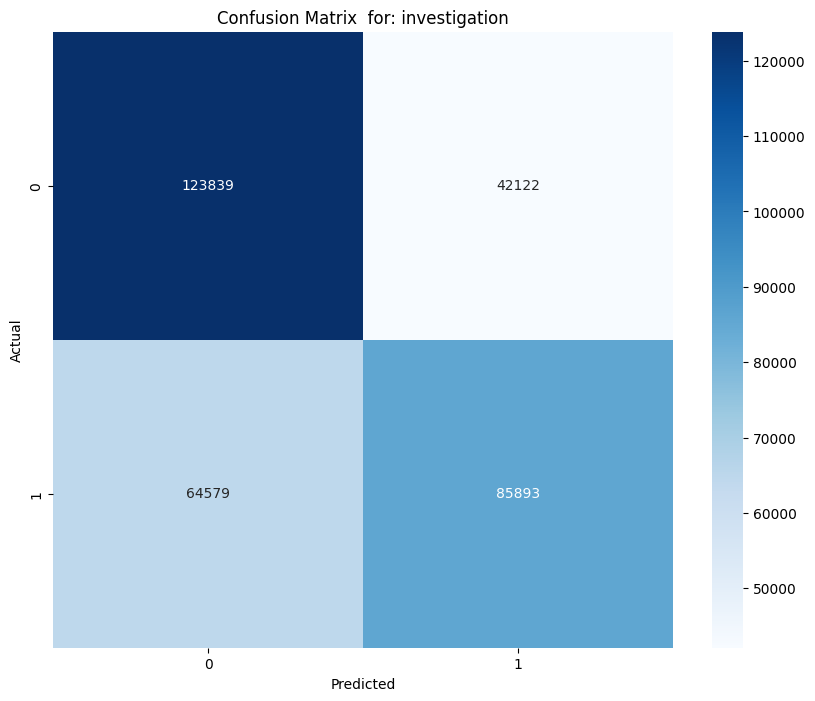

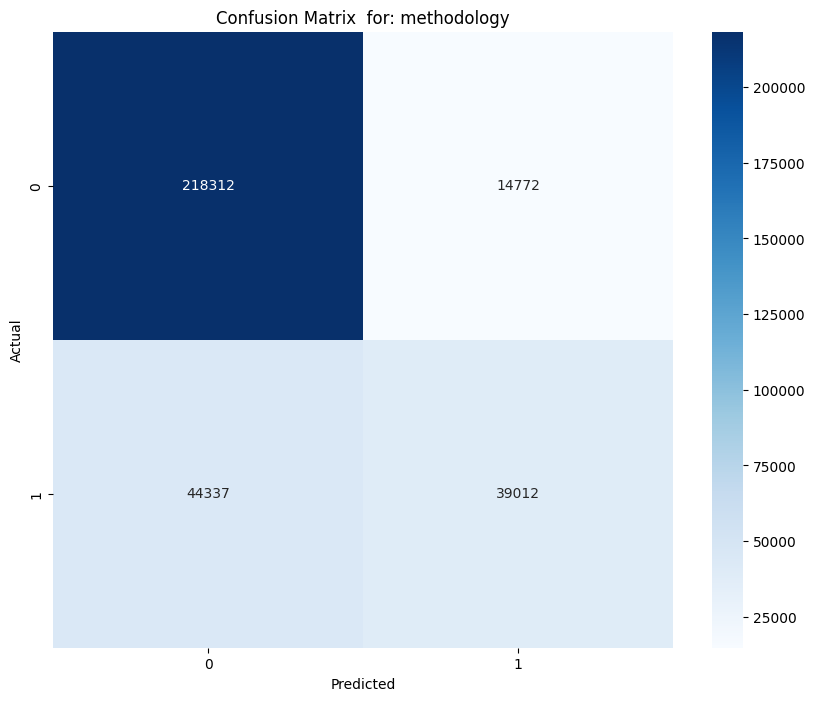

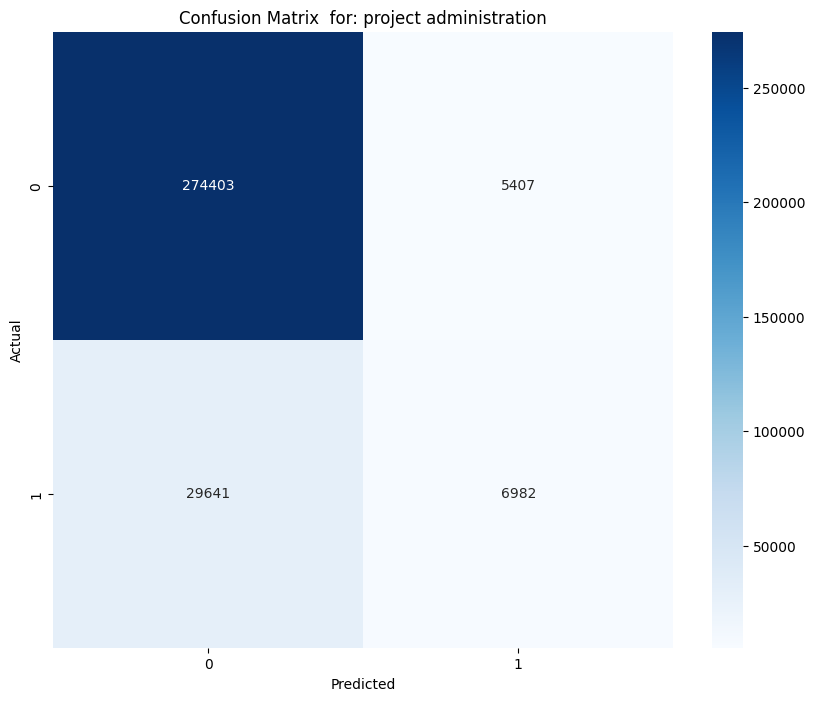

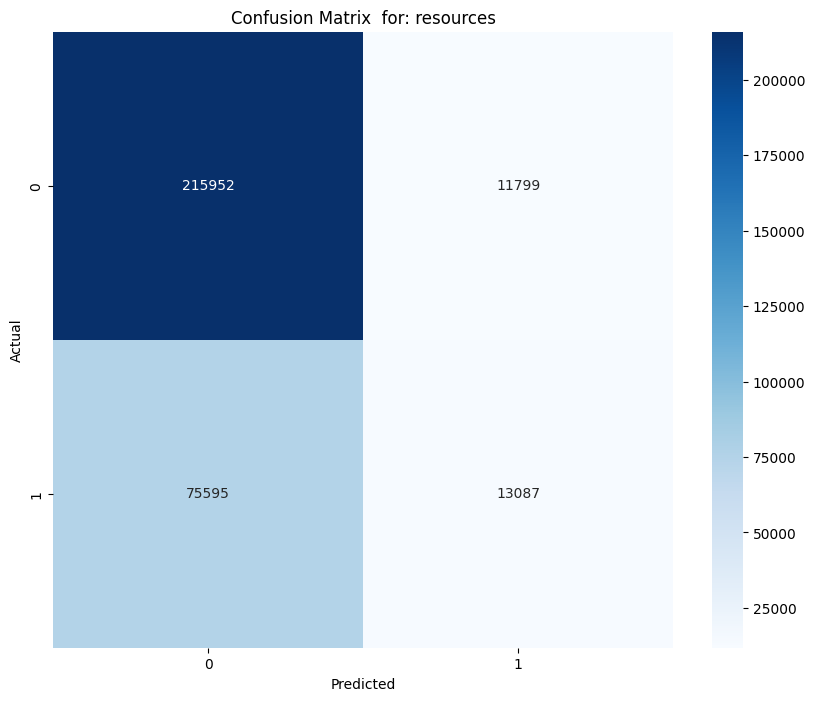

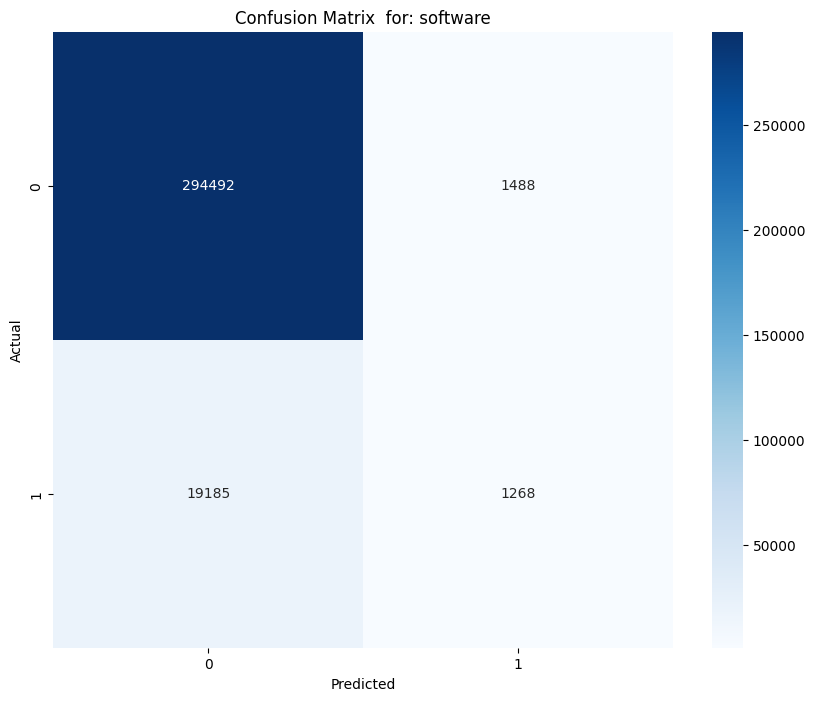

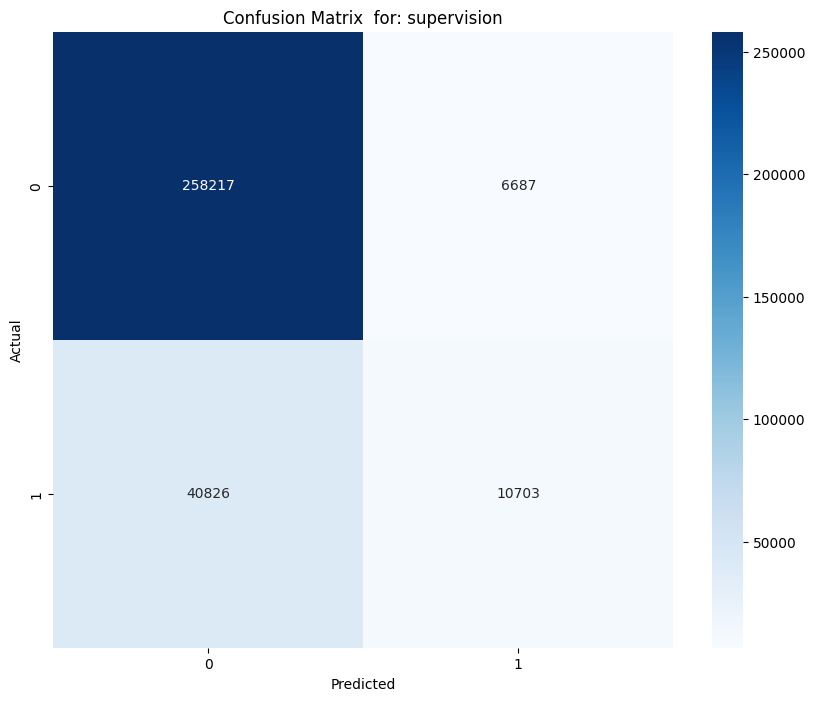

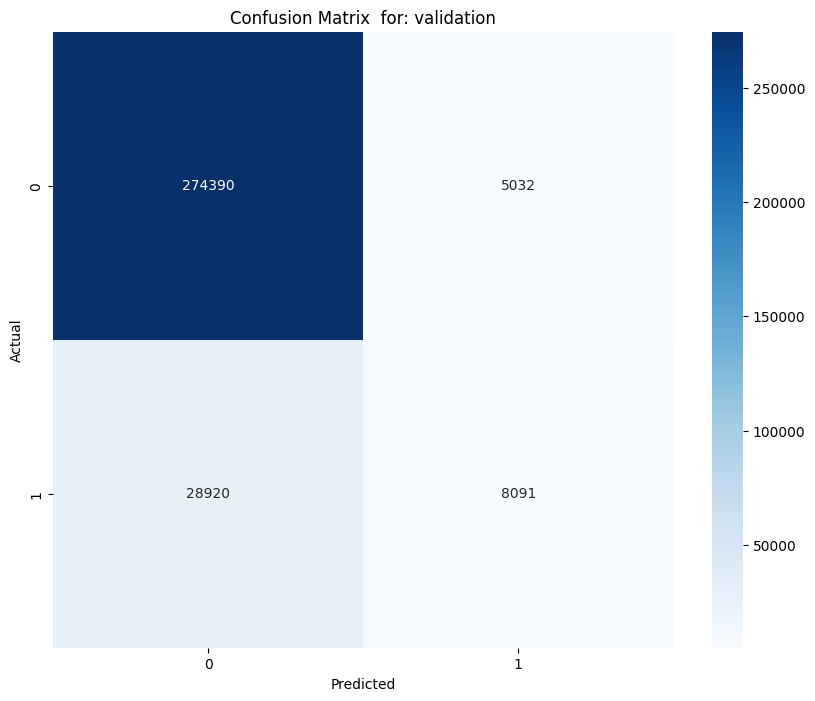

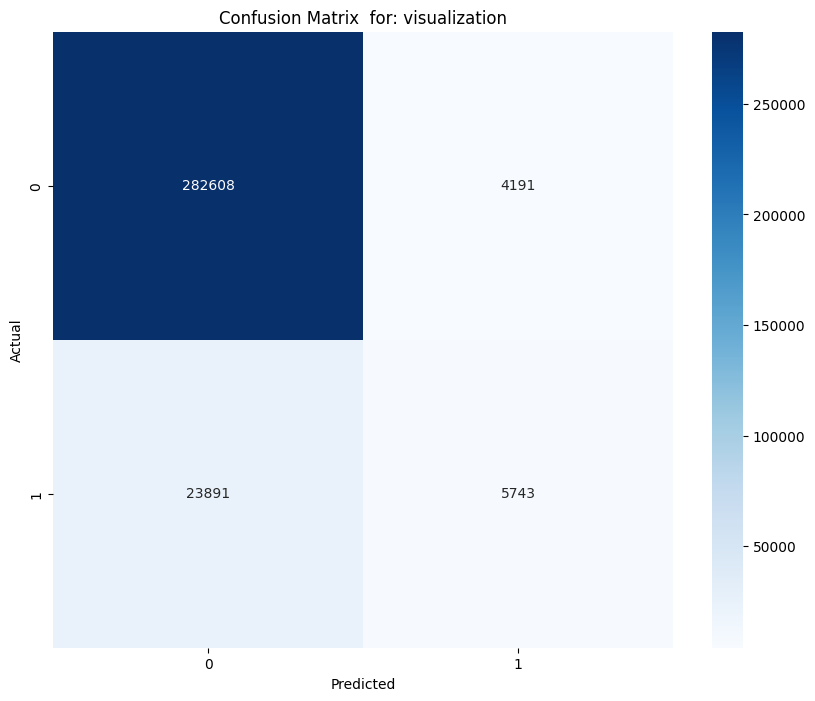

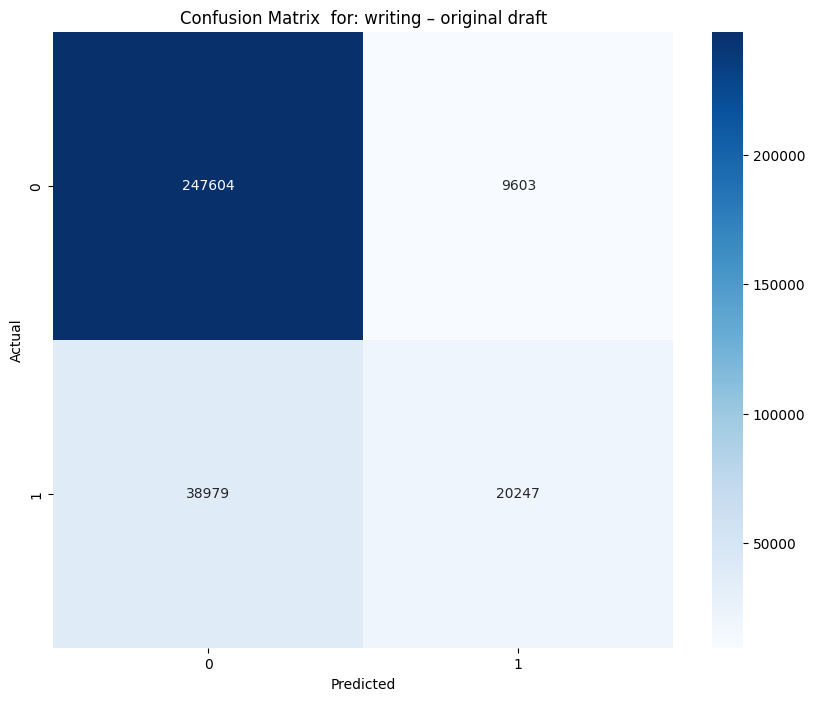

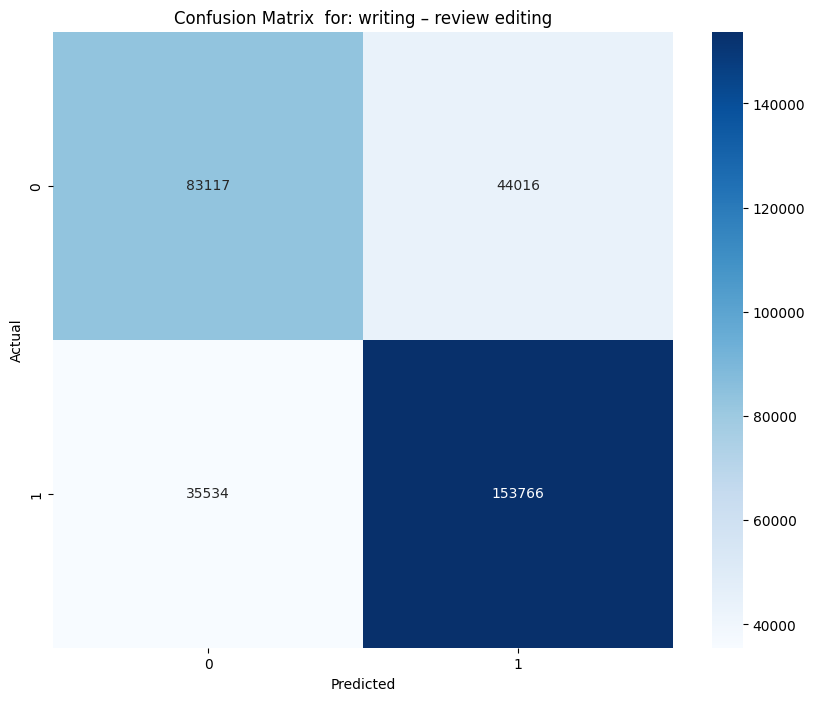

In [13]:
for contribution_type, model_predictions in predictions.items():
  conf_matrix = confusion_matrix(y_test[contribution_type], model_predictions)

  # Visualize the confusion matrix
  plt.figure(figsize=(10, 8))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f"Confusion Matrix  for: {contribution_type}")
  plt.show()

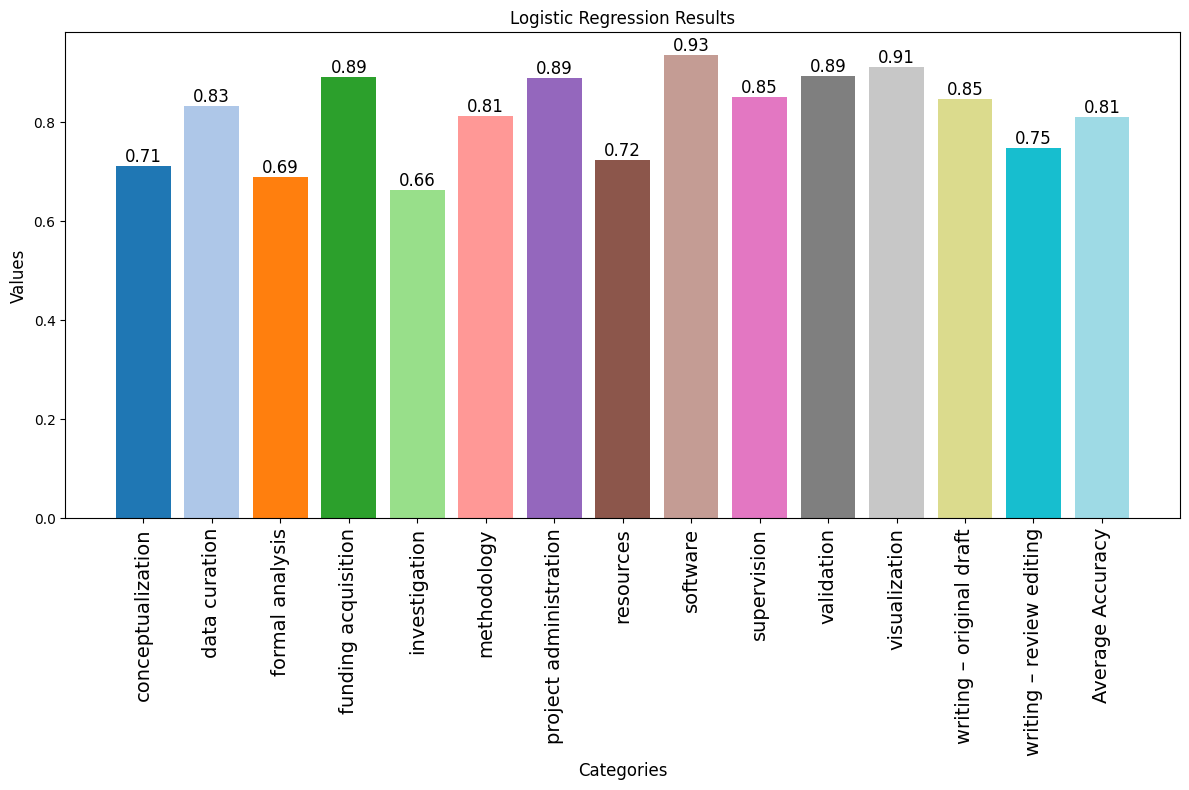

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = list(predictions.keys())+['Average Accuracy']
values = accuracy_list+[0.81]
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

# Create bar plot
plt.figure(figsize=(12, 8))
bars=plt.bar(categories, values,color=colors)

# Rotate x-axis labels
plt.xticks(rotation=90,fontsize=14)

# Add labels and title
plt.xlabel('Categories',fontsize=12)
plt.ylabel('Values',fontsize=12)
plt.title('Xgboost Clasifier Results')
for bar, value in zip(bars, values):
     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() , f"{value:.2f}",
             ha='center', va='bottom', fontsize=12)
# Show plot
plt.tight_layout()
plt.show()


### MultinomialNB

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

# Training separate models for each contribution type using Random Forest
models = {}
for contribution_type in contribution_types:
    print(f"Training model for {contribution_type}...")
    model =  MultinomialNB()

    model.fit(X_train, y_train[contribution_type])
    models[contribution_type] = model

# Making predictions for each contribution type
predictions = {}
for contribution_type, model in models.items():
    predictions[contribution_type] = model.predict(X_test)

# Evaluating the performance of the models
print("Evaluation results for each contribution type:")
for contribution_type, model_predictions in predictions.items():
    accuracy = accuracy_score(y_test[contribution_type], model_predictions)
    print(f"Contribution Type: {contribution_type}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:")
    print(classification_report(y_test[contribution_type], model_predictions))


In [11]:
accuracy_list=[]
for contribution_type, model_predictions in predictions.items():
    accuracy = accuracy_score(y_test[contribution_type], model_predictions)
    print(f"Accuracy {contribution_type}: {accuracy}")
    accuracy_list.append(accuracy)

print("Accuracy Model: ", sum(accuracy_list)/len(accuracy_list))

Accuracy conceptualization: 0.6191863680463163
Accuracy data curation: 0.8185903492998517
Accuracy formal analysis: 0.645406768573442
Accuracy funding acquisition: 0.8836309740134562
Accuracy investigation: 0.627469322099781
Accuracy methodology: 0.7897185186121549
Accuracy project administration: 0.8741281724725297
Accuracy resources: 0.7212680093416299
Accuracy software: 0.9149551405826826
Accuracy supervision: 0.8339427303726223
Accuracy validation: 0.8795195191399127
Accuracy visualization: 0.8969702907092497
Accuracy writing – original draft: 0.824705387870418
Accuracy writing – review editing: 0.6641311114833156
Accuracy Model:  0.785258761615526


In [ ]:
from sklearn.metrics import confusion_matrix
for contribution_type, model_predictions in predictions.items():
  conf_matrix = confusion_matrix(y_test[contribution_type], model_predictions)

  # Visualize the confusion matrix
  plt.figure(figsize=(10, 8))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f"Confusion Matrix  for: {contribution_type}")
  plt.show()